# Q&A Activity - Week 06

## Read the data set into python

    Qn. 1. Find out how many countries are there in the dataset.
    
    Qn. 2. Find out how many countries with respect to the region are available in the dataset
    
    Qn. 3. On average which region has the highest
            a. GDP per capita (current US$)
            b. International trade: Imports (million US$)
            
    Qn. 4. Find out which region has more consistent with respect to GDP per capita (current US$)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing 'xlsx' data to Python Environment

In [2]:
GDP = pd.read_excel("Desktop\ICTK\Week_06_Activity\Dataset_w6.xlsx")

In [3]:
GDP.head()

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864,35530,623.2,125,3568
1,Albania,SouthernEurope,28748,2930,3984.2,134,4669
2,Algeria,NorthernAfrica,2381741,41318,4154.1,160,47091
3,Angola,MiddleAfrica,1246700,29784,4714.1,175,8790
4,Antigua and Barbuda,Caribbean,442,102,14764.5,88,491


## Qn. 1. Find out how many countries are there in the dataset?

In [4]:
total_countries = GDP['country'].count()
print('The total No. of Countires = ',total_countries)

The total No. of Countires =  196


## Qn. 2. Find out how many countries with respect to the region are available in the dataset?

In [5]:
region_countries = GDP.groupby("Region",as_index=False).size().sort_values('size', ascending=False).reset_index()
print('The total no. of countries based on each region is :\n')
region_countries

The total no. of countries based on each region is :



,index,Region,size
0,20,WesternAsia,18
1,3,EasternAfrica,17
2,0,Caribbean,16
3,19,WesternAfrica,15
4,18,SouthernEurope,12
5,15,SouthAmerica,12
6,14,South-easternAsia,11
7,11,NorthernEurope,10
8,5,EasternEurope,10
9,8,MiddleAfrica,9


#### Plotting graph of Region Vs Countries

Text(0, 0.5, 'Number of Countries')

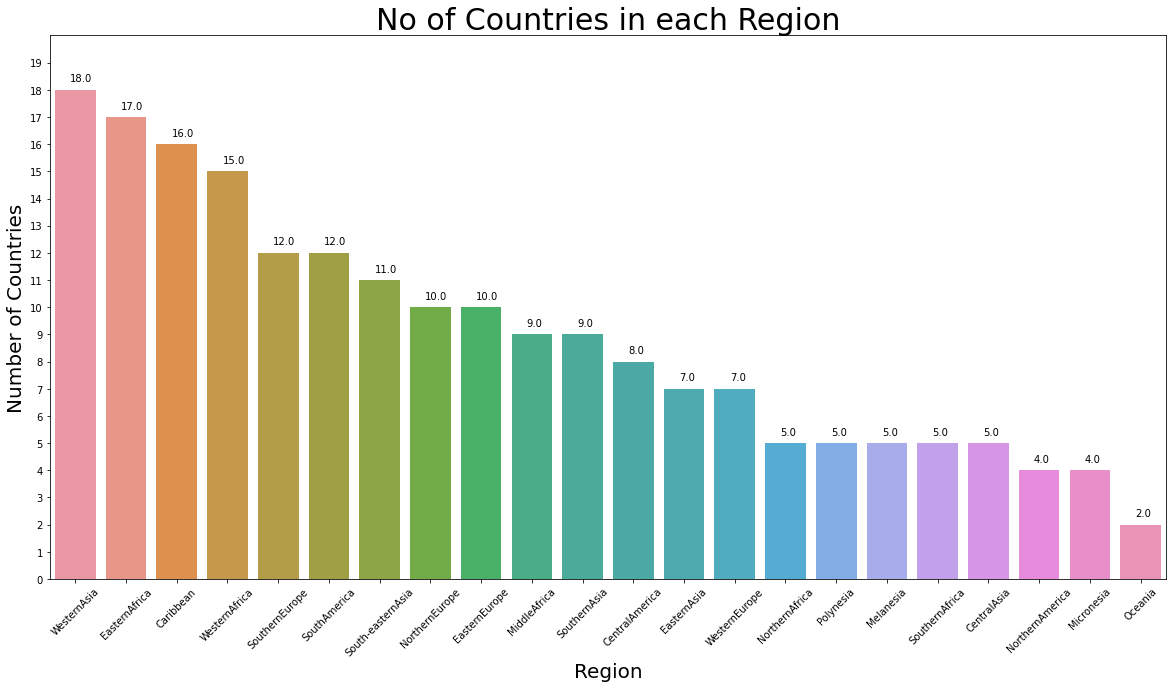

In [6]:
plt.figure(figsize=(20,10))
plt.ylim(0,20)
plt.xlabel("Region",fontsize=20)
plt.xticks(rotation=45)
plt.yticks(range(0,20))


graph=sns.barplot(x='Region',y='size',data=region_countries)
plt.title('No of Countries in each Region',size=30)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.3))
plt.ylabel("Number of Countries",fontsize=20)

In [7]:
desc = region_countries["size"].describe()
desc

count    22.000000
mean      8.909091
std       4.586825
min       2.000000
25%       5.000000
50%       8.500000
75%      11.750000
max      18.000000
Name: size, dtype: float64

# Insights;
1) There are countries ranging from 2 to 18 no.s in 22 regions 

2) Avg countries per region is 8.91

## Qn. 3. On average which region has the highest;  (a) GDP per capita (current US$)

In [8]:
mean_GDP = GDP.groupby("Region")["GDP per capita (current US$)"].mean().reset_index()
highest_GDP = mean_GDP.sort_values('GDP per capita (current US$)',ascending=False).head(1)
print('The Region that has the highest GDP per capita (current US$):\n')
highest_GDP

The Region that has the highest GDP per capita (current US$):



,Region,GDP per capita (current US$)
10,NorthernAmerica,57659.0


## Qn. 3. On average which region has the highest;  (b) International trade: Imports (million US$)

In [9]:
mean_Import = GDP.groupby("Region")["International trade: Imports (million US$)"].mean().reset_index()
highest_Import = mean_Import.sort_values("International trade: Imports (million US$)",ascending=False).head(1)
print('The Region that has the highest International trade: Imports (million US$):')
highest_Import

The Region that has the highest International trade: Imports (million US$):


,Region,International trade: Imports (million US$)
10,NorthernAmerica,663552.25


## Qn. 4. Find out which region has more consistent with respect to GDP per capita (current US$) 

In [10]:
Std_GDP = GDP.groupby("Region")["GDP per capita (current US$)"].std().reset_index()
consistant_GDP=Std_GDP.sort_values('GDP per capita (current US$)',ascending=True).head(1)
print('The Region that has more consistent with respect to GDP per capita (current US$):')
consistant_GDP

The Region that has more consistent with respect to GDP per capita (current US$):


,Region,GDP per capita (current US$)
19,WesternAfrica,815.095399


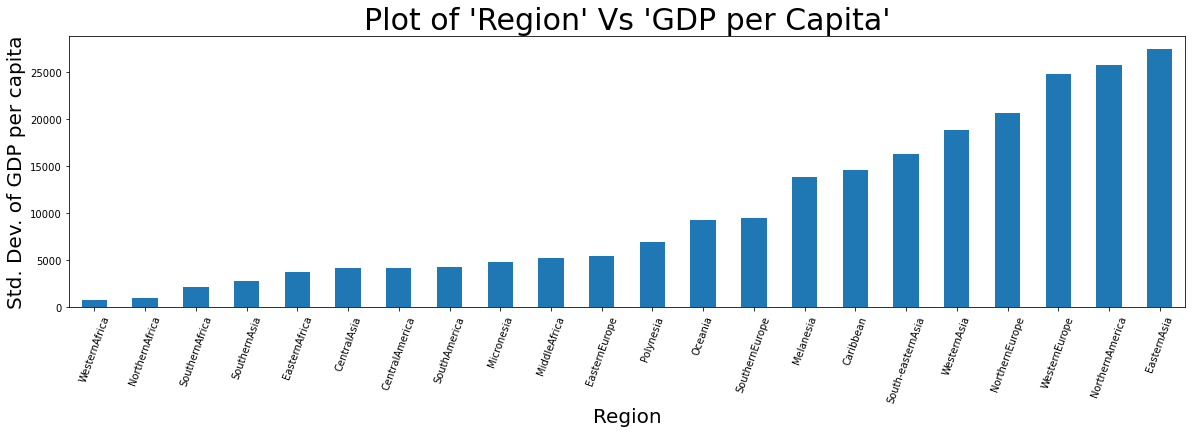

In [11]:
plt.figure(figsize=(20,5))
Std_GDP_Plot = GDP.groupby("Region")["GDP per capita (current US$)"].std().sort_values().plot(kind ='bar')
Std_GDP_Plot
plt.xticks(rotation=70)
plt.title("Plot of 'Region' Vs 'GDP per Capita'",size=30)
plt.xlabel("Region",fontsize=20)
plt.ylabel("Std. Dev. of GDP per capita",fontsize=20)
plt.show()

# Insights
1) Region with the highest deviation in ‘GDP per capita’ from the mean is Eastern Asia & with the lowest in Western Africa.